<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

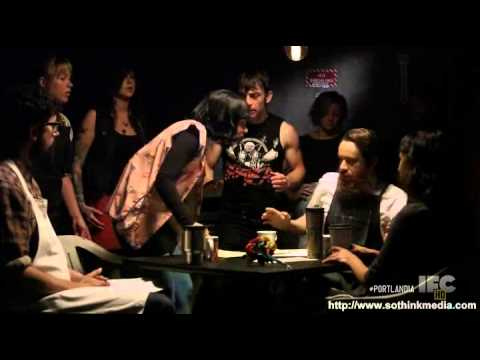

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/markmorelos/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Start here 
# Import required libraries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [58]:
# extracting the review texts from the full_review_text column
shops['review_text'] = shops['full_review_text'].str.replace('\d+', '').astype(str)
shops['review_text'] = shops['review_text'].str.replace('/', '').astype(str)

# remove white space
shops['review_text'] = shops['review_text'].str.lstrip()

# convert to lowercase
shops['review_text'] = shops['review_text'].apply(lambda x: x.lower())
shops['review_text']

0       check-in love love loved the atmosphere! every...
1       listed in date night: austin, ambiance in aust...
2       check-in listed in brunch spots i loved the ec...
3       very cool decor! good drinks nice seating  how...
4       check-in they are located within the northcros...
                              ...                        
7611    i actually step into this restaurant by chance...
7612    ok, the steeping room is awesome. how do they ...
7613    loved coming here for tea, and the atmosphere ...
7614    the food is just average. the booths didn't fe...
7615    i finally stopped in for lunch with my colleag...
Name: review_text, Length: 7616, dtype: object

In [59]:
# extracting just the numbers from the star_rating column
shops['rating'] = shops['star_rating'].str.extract('(\d+)').astype(int)
shops['rating']

0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: rating, Length: 7616, dtype: int64

In [60]:
# tokenize
# define tokenize function
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [61]:
# make features for good/bad
shops['Good/Bad'] = shops['rating'].map({1:'Bad',
                                        2:'Bad',
                                        3:'Bad',
                                        4:'Good',
                                        5:'Good'})
shops['Good/Bad'].value_counts()

Good    6140
Bad     1476
Name: Good/Bad, dtype: int64

In [62]:
# using the tokenize function in the review_text column
shops['review_text_tokens'] = shops['review_text'].apply(tokenize)
shops['review_text_tokens'].head()

0    [checkin, love, love, loved, the, atmosphere, ...
1    [listed, in, date, night, austin, ambiance, in...
2    [checkin, listed, in, brunch, spots, i, loved,...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [checkin, they, are, located, within, the, nor...
Name: review_text_tokens, dtype: object

In [63]:
# check value counts of coffee shop names
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [64]:
# create a function that takes a corpus of document and returns a
# dataframe of word counts to analyze

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [65]:
wc = count(shops['review_text_tokens'])
print(wc.shape)
wc.head()

(19843, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
27,the,6847,34809,1.0,0.045412,0.045412,0.899028
64,and,6864,26651,2.0,0.034769,0.080180,0.901261
67,a,6246,22756,3.0,0.029687,0.109868,0.820116
49,i,5532,20249,4.0,0.026417,0.136284,0.726366
0,to,5653,17164,5.0,0.022392,0.158676,0.742253


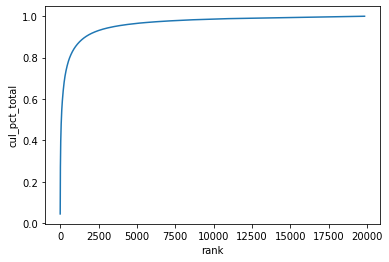

In [66]:
# cumulative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

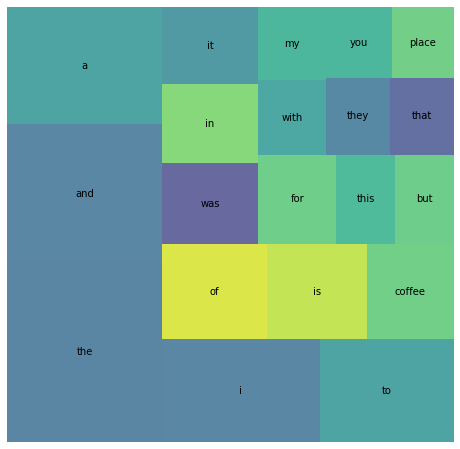

In [67]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [68]:
# using spaCy
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [69]:
tokens = []
for doc in tokenizer.pipe(shops['review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['spaCy_tokens'] = tokens
shops['spaCy_tokens'].head()

0    [check-in, love, love, loved, the, atmosphere!...
1    [listed, in, date, night:, austin,, ambiance, ...
2    [check-in, listed, in, brunch, spots, i, loved...
3    [very, cool, decor!, good, drinks, nice, seati...
4    [check-in, they, are, located, within, the, no...
Name: spaCy_tokens, dtype: object

In [70]:
wc = count(shops['spaCy_tokens'])
print(wc.shape)
wc.head()

(38025, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,the,6847,34649,1.0,0.043809,0.043809,0.899028
68,and,6853,26442,2.0,0.033432,0.077241,0.899816
70,a,6240,22657,3.0,0.028647,0.105887,0.819328
49,i,5511,19991,4.0,0.025276,0.131163,0.723608
55,,4787,17390,5.0,0.021987,0.153150,0.628545


In [71]:
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spaCy_tokens_v2'] = tokens
shops['spaCy_tokens_v2'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, aust...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [check-in, located, northcross, mall, shopping...
Name: spaCy_tokens_v2, dtype: object

In [72]:
wc = count(shops['spaCy_tokens_v2'])
print(wc.shape)
wc.head()

(37592, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,,4787,17390,1.0,0.043210,0.043210,0.628545
28,coffee,4213,8063,2.0,0.020035,0.063245,0.553178
112,place,3029,4264,3.0,0.010595,0.073840,0.397715
123,great,2438,3250,4.0,0.008076,0.081916,0.320116
255,it's,2061,3117,5.0,0.007745,0.089661,0.270614


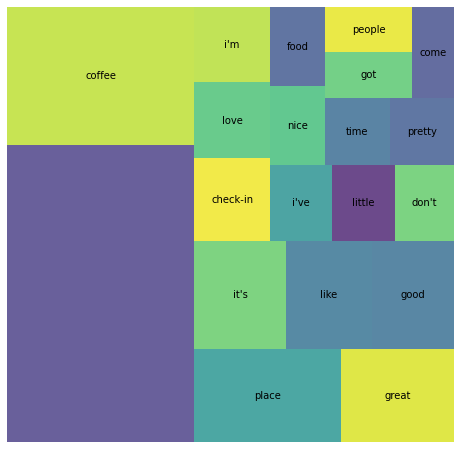

In [73]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [74]:
# extending stop words
STOP_WORDS = nlp.Defaults.stop_words.union([' ','I', 'i', "don't", "i'm", "it's", "i've", 'the', 'this'])

In [76]:
tokens = []
for doc in tokenizer.pipe(shops['review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['spaCy_tokens_v3'] = tokens

wc = count(shops['spaCy_tokens_v3'])
print(wc.shape)
wc.head()

(37587, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,coffee,4213,8063,1.0,0.021372,0.021372,0.553178
111,place,3029,4264,2.0,0.011302,0.032674,0.397715
122,great,2438,3250,3.0,0.008614,0.041288,0.320116
182,like,2034,2902,4.0,0.007692,0.048980,0.267069
158,good,2084,2779,5.0,0.007366,0.056346,0.273634


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [77]:
shops['Good'] = shops['Good/Bad'] == 'Good'
shops['Bad'] = shops['Good/Bad'] == 'Bad'
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,review_text,rating,Good/Bad,review_text_tokens,spaCy_tokens,spaCy_tokens_v2,spaCy_tokens_v3,Good,Bad
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016,check-in love love loved the atmosphere! every...,5,Good,"[checkin, love, love, loved, the, atmosphere, ...","[check-in, love, love, loved, the, atmosphere!...","[check-in, love, love, loved, atmosphere!, cor...","[check-in, love, love, loved, atmosphere!, cor...",True,False
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,NaN,"listed in date night: austin, ambiance in aust...",4,Good,"[listed, in, date, night, austin, ambiance, in...","[listed, in, date, night:, austin,, ambiance, ...","[listed, date, night:, austin,, ambiance, aust...","[listed, date, night:, austin,, ambiance, aust...",True,False
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016,check-in listed in brunch spots i loved the ec...,4,Good,"[checkin, listed, in, brunch, spots, i, loved,...","[check-in, listed, in, brunch, spots, i, loved...","[check-in, listed, brunch, spots, loved, eclec...","[check-in, listed, brunch, spots, loved, eclec...",True,False
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016,very cool decor! good drinks nice seating how...,2,Bad,"[very, cool, decor, good, drinks, nice, seatin...","[very, cool, decor!, good, drinks, nice, seati...","[cool, decor!, good, drinks, nice, seating, ,...","[cool, decor!, good, drinks, nice, seating, ho...",False,True
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,NaN,check-in they are located within the northcros...,4,Good,"[checkin, they, are, located, within, the, nor...","[check-in, they, are, located, within, the, no...","[check-in, located, northcross, mall, shopping...","[check-in, located, northcross, mall, shopping...",True,False


(37587, 7) (31878, 7) (31878, 7)


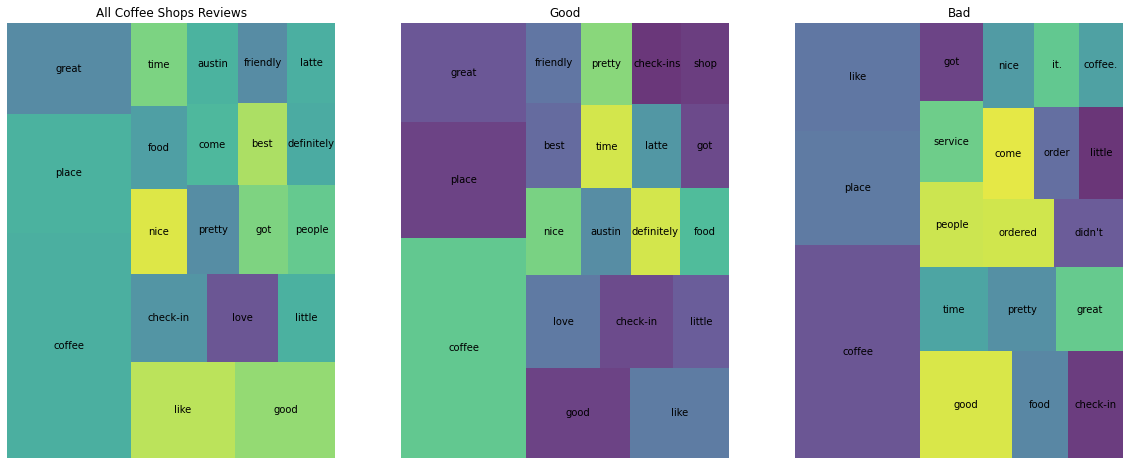

In [81]:
# Use the Function for all reviews, Good only, and Bad only
wc = count(shops['spaCy_tokens_v3'])
Good = count(shops[shops['Good'] == True]['spaCy_tokens_v3'])
Bad = count(shops[shops['Bad'] == True]['spaCy_tokens_v3'])
print(wc.shape, Good.shape, Good.shape)

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
Good_top20 = Good[Good['rank'] <= 20]
Bad_top20 = Bad[Bad['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Coffee Shops Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good')
squarify.plot(sizes=Good_top20['pct_total'], label=Good_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad')
squarify.plot(sizes=Bad_top20['pct_total'], label=Bad_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

In [82]:
shops['rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: rating, dtype: int64

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

